In [13]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [15]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [16]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "ctabGAN-qtr"

In [46]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME, version=3)
    curr_image_dir = os.path.join(const.dir.images_hp_v3(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v3(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v3(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

In [ ]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

  0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.834343,0.887393,0.769207,0.891785,0.646629,0.002264,0.001993,0.004489,0.001889,0.009085
1,0.05,0.834181,0.887635,0.770933,0.891268,0.650598,0.002824,0.003326,0.004641,0.002270,0.008983
2,0.10,0.835139,0.890280,0.772370,0.891862,0.652878,0.002278,0.002427,0.004216,0.002144,0.009047
3,0.15,0.836555,0.891496,0.774539,0.892767,0.656310,0.002217,0.001952,0.002259,0.001976,0.004607
4,0.20,0.835750,0.891364,0.773020,0.892302,0.653739,0.002290,0.001776,0.005496,0.001932,0.011252
5,0.25,0.835833,0.890920,0.774474,0.892085,0.656863,0.003046,0.003304,0.002893,0.002620,0.005253
6,0.30,0.835525,0.890637,0.772544,0.892190,0.652898,0.002221,0.001926,0.005290,0.001874,0.010861
7,0.35,0.837065,0.891290,0.773203,0.893522,0.652883,0.002464,0.001497,0.003444,0.002182,0.007141
8,0.40,0.836600,0.891115,0.774543,0.892806,0.656281,0.001950,0.001607,0.003980,0.001544,0.007902
9,0.45,0.837301,0.891212,0.774055,0.893574,0.654536,0.002685,0.001652,0.003681,0.002207,0.007008


  0%|          | 0/240 [00:00<?, ?it/s]

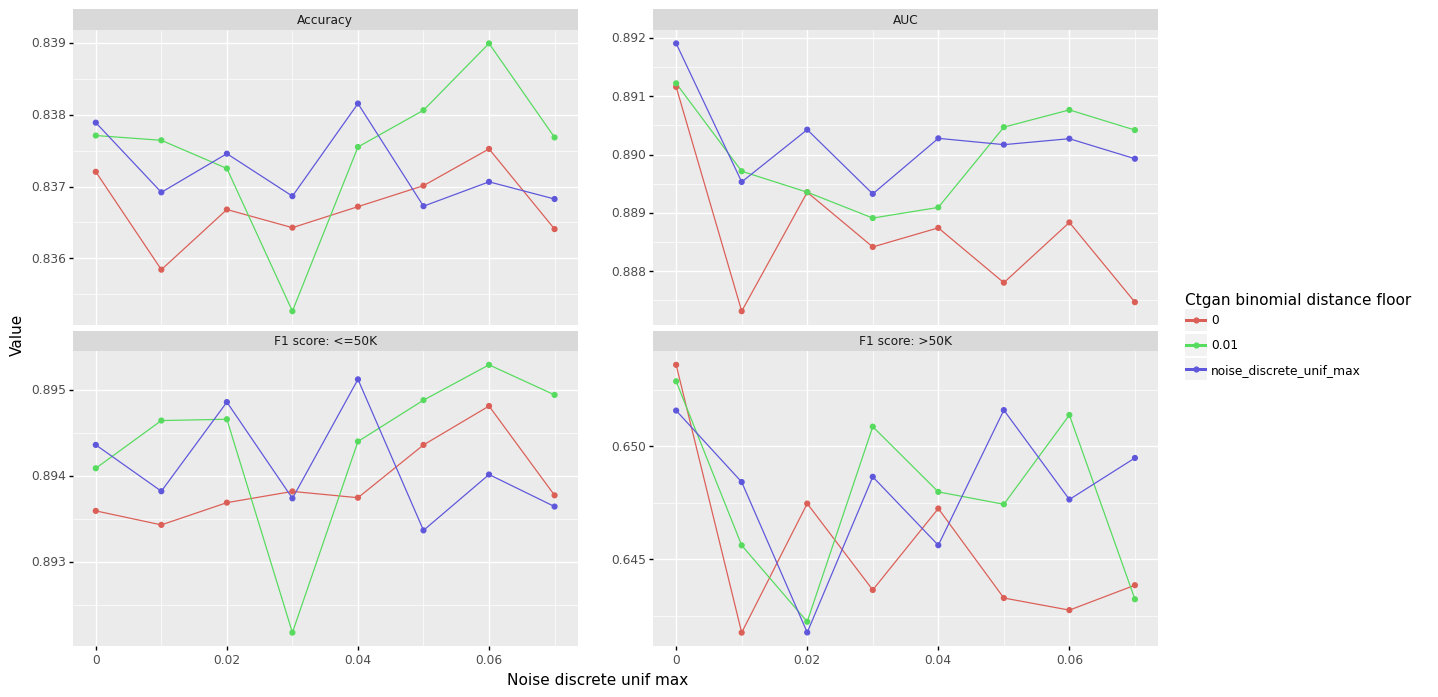

In [21]:
result_noise_ctgan = plot_hp_tuning("noise_ctgan")

In [22]:
result_noise_ctgan

,Noise discrete unif max,Ctgan binomial distance floor,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0,0.837205,0.891162,0.773594,0.893591,0.653597,0.001610,0.001277,0.002385,0.001357,0.004741
1,0.00,0.01,0.837709,0.891223,0.773477,0.894086,0.652868,0.001399,0.001360,0.003438,0.001096,0.006928
2,0.00,noise_discrete_unif_max,0.837888,0.891908,0.772965,0.894357,0.651573,0.001388,0.001465,0.003896,0.000964,0.007762
3,0.01,0,0.835843,0.887313,0.767589,0.893428,0.641749,0.003127,0.002076,0.006240,0.003298,0.014324
4,0.01,0.01,0.837643,0.889715,0.770125,0.894640,0.645610,0.001845,0.001513,0.007418,0.001534,0.015398
5,0.01,noise_discrete_unif_max,0.836919,0.889531,0.771115,0.893819,0.648411,0.002013,0.001748,0.003264,0.001753,0.006740
6,0.02,0,0.836680,0.889354,0.770573,0.893686,0.647459,0.002975,0.002310,0.003745,0.002660,0.007910
7,0.02,0.01,0.837251,0.889355,0.768444,0.894655,0.642233,0.002540,0.001888,0.003850,0.001894,0.007002
8,0.02,noise_discrete_unif_max,0.837457,0.890428,0.768306,0.894854,0.641757,0.001880,0.002021,0.005956,0.001144,0.011762
9,0.03,0,0.836428,0.888416,0.768727,0.893817,0.643637,0.001523,0.001377,0.005162,0.001391,0.010887


  0%|          | 0/240 [00:00<?, ?it/s]

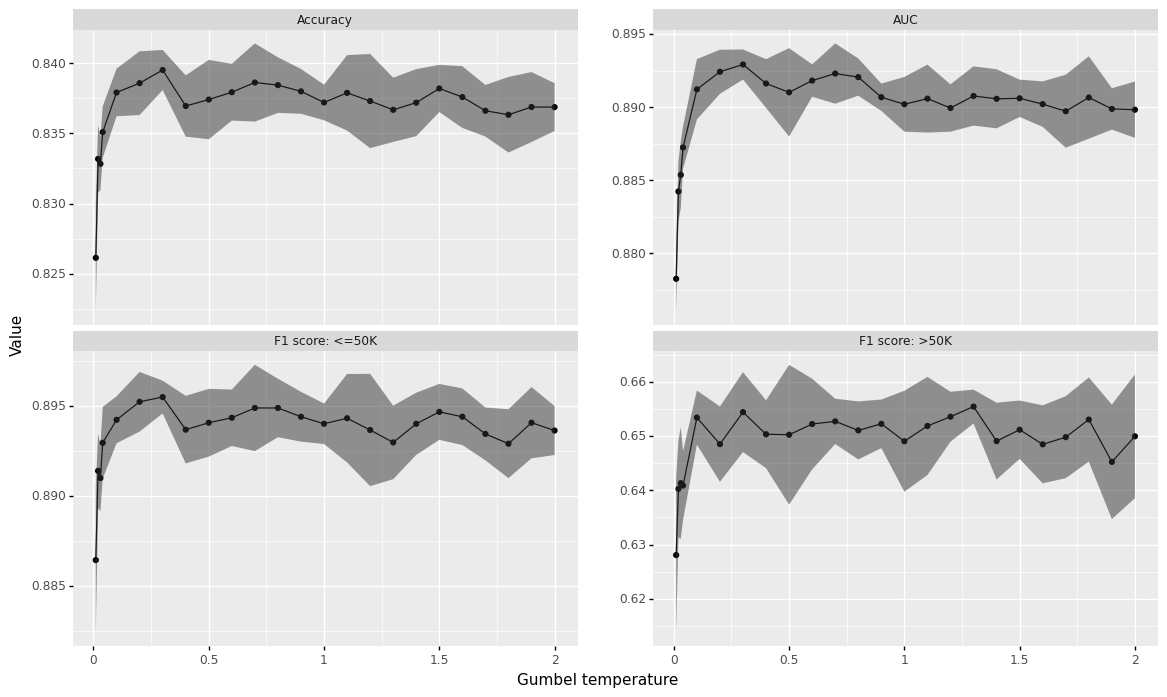

In [23]:
result_gumbel_temperature = plot_hp_tuning("gumbel_temperature")

In [24]:
result_gumbel_temperature

,Gumbel temperature,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.01,0.826135,0.878256,0.757256,0.886429,0.628083,0.003802,0.002216,0.005965,0.004029,0.014279
1,0.02,0.833181,0.884232,0.765827,0.891383,0.640272,0.002421,0.002092,0.004382,0.002056,0.008927
2,0.03,0.832835,0.885368,0.766150,0.890983,0.641317,0.001868,0.002290,0.004720,0.001839,0.010283
3,0.04,0.835093,0.887241,0.766914,0.892943,0.640885,0.001827,0.001445,0.002424,0.001990,0.006325
4,0.10,0.837915,0.891220,0.773803,0.894219,0.653387,0.001693,0.002064,0.002671,0.001304,0.004983
5,0.20,0.838579,0.892422,0.771863,0.895221,0.648504,0.002270,0.001507,0.003766,0.001656,0.006927
6,0.30,0.839515,0.892918,0.774938,0.895482,0.654394,0.001427,0.001029,0.003778,0.000910,0.007359
7,0.40,0.836952,0.891618,0.771996,0.893673,0.650319,0.002182,0.001665,0.003093,0.001875,0.006245
8,0.50,0.837410,0.891014,0.772144,0.894056,0.650231,0.002827,0.003023,0.006706,0.001882,0.012868
9,0.60,0.837935,0.891818,0.773268,0.894333,0.652202,0.002023,0.001108,0.004219,0.001567,0.008342


  0%|          | 0/75 [00:00<?, ?it/s]

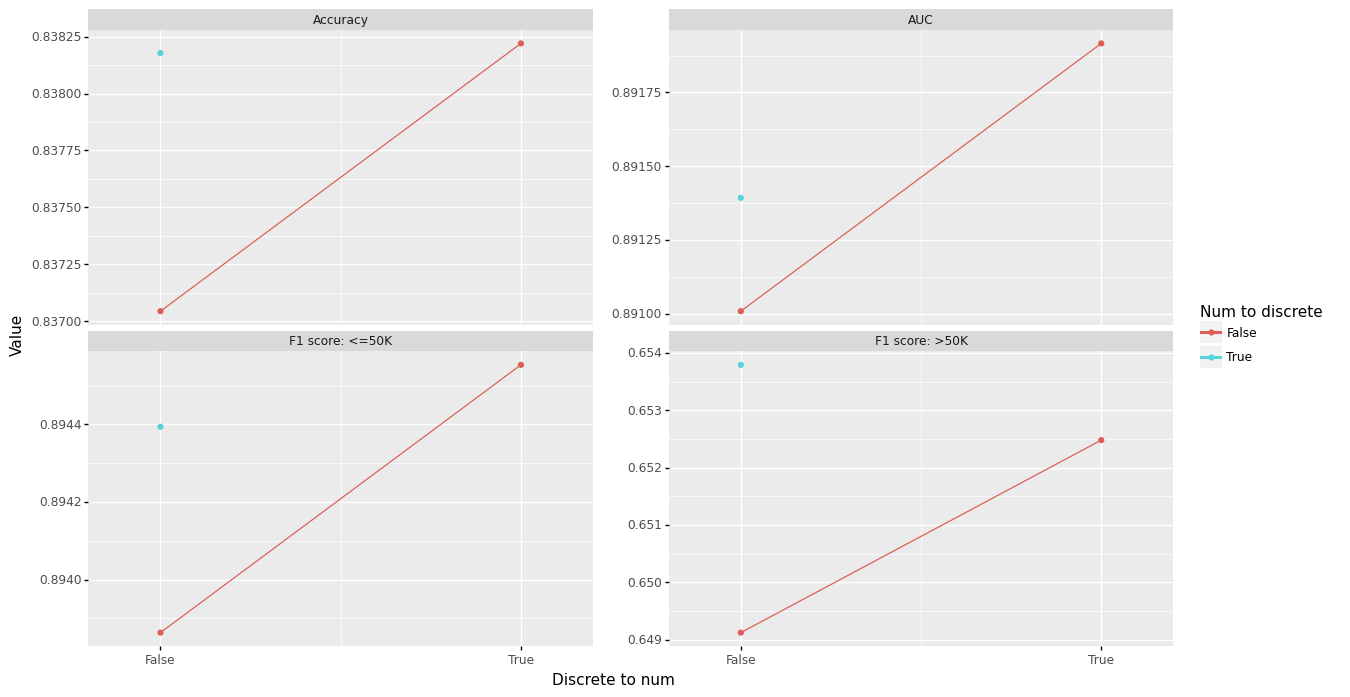

In [25]:
result_add_connection = plot_hp_tuning("add_connection")

In [26]:
result_add_connection

,Discrete to num,Num to discrete,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,False,0.837044,0.891009,0.771495,0.893863,0.649126,0.002643,0.002186,0.003651,0.002073,0.006710
1,False,True,0.838178,0.891393,0.774094,0.894394,0.653794,0.002342,0.002005,0.002859,0.002029,0.005721
2,True,False,0.838220,0.891916,0.773517,0.894553,0.652481,0.002248,0.001851,0.003263,0.001852,0.006355


  0%|          | 0/240 [00:00<?, ?it/s]

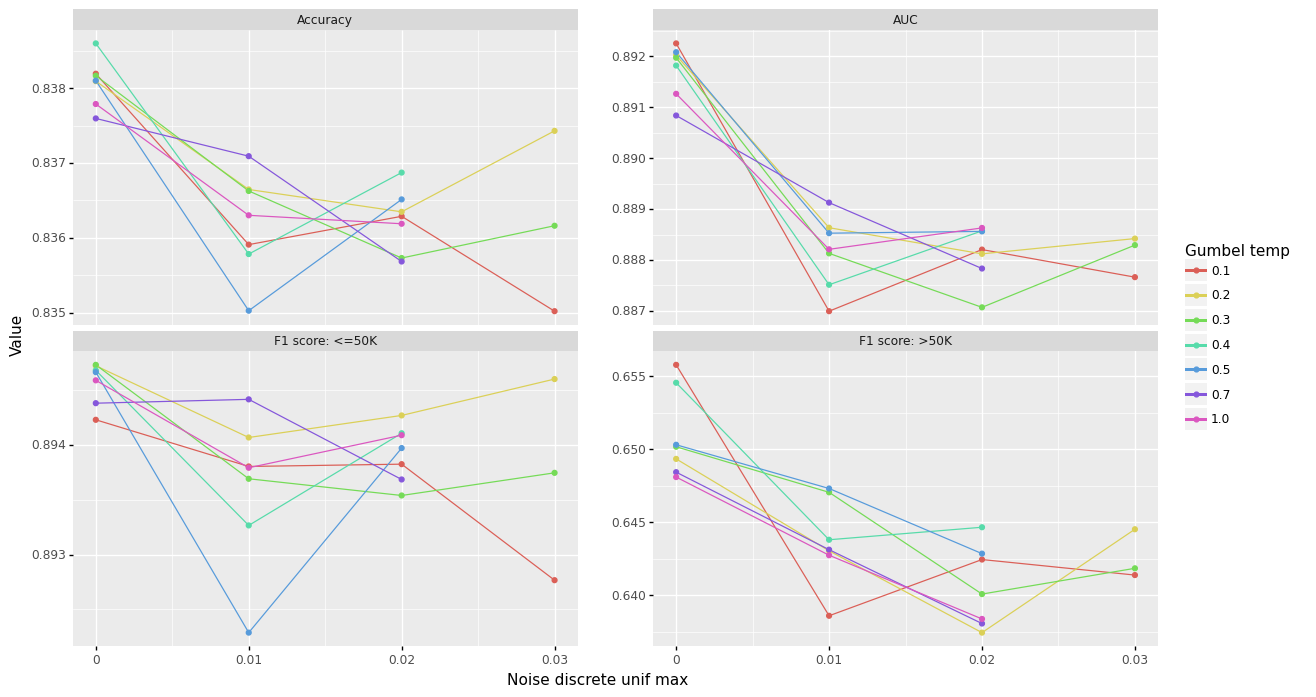

In [27]:
result_oh_encoding_choices = plot_hp_tuning("oh_encoding_choices")

In [28]:
result_oh_encoding_choices

,Noise discrete unif max,Gumbel temp,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.1,0.838194,0.892256,0.775004,0.894225,0.655782,0.002220,0.001498,0.002398,0.001909,0.004655
1,0.00,0.2,0.838094,0.892023,0.772030,0.894717,0.649343,0.001908,0.001332,0.003525,0.001921,0.007942
2,0.00,0.3,0.838167,0.891974,0.772450,0.894725,0.650175,0.002249,0.002229,0.003703,0.001609,0.006727
3,0.00,0.4,0.838599,0.891821,0.774616,0.894675,0.654556,0.002876,0.002147,0.003189,0.002482,0.006210
4,0.00,0.5,0.838101,0.892083,0.772484,0.894659,0.650310,0.001800,0.001409,0.002196,0.001474,0.004126
5,0.00,0.7,0.837596,0.890839,0.771405,0.894376,0.648434,0.004016,0.003413,0.007962,0.002637,0.014576
6,0.00,1.0,0.837789,0.891265,0.771342,0.894584,0.648099,0.001812,0.001503,0.004962,0.001121,0.009661
7,0.01,0.1,0.835910,0.886994,0.766203,0.893801,0.638604,0.001518,0.001820,0.006207,0.001658,0.013415
8,0.01,0.2,0.836647,0.888634,0.768557,0.894064,0.643050,0.001397,0.001923,0.004384,0.001213,0.009155
9,0.01,0.3,0.836627,0.888131,0.770372,0.893689,0.647055,0.001359,0.001226,0.004043,0.001315,0.008633


  0%|          | 0/225 [00:00<?, ?it/s]

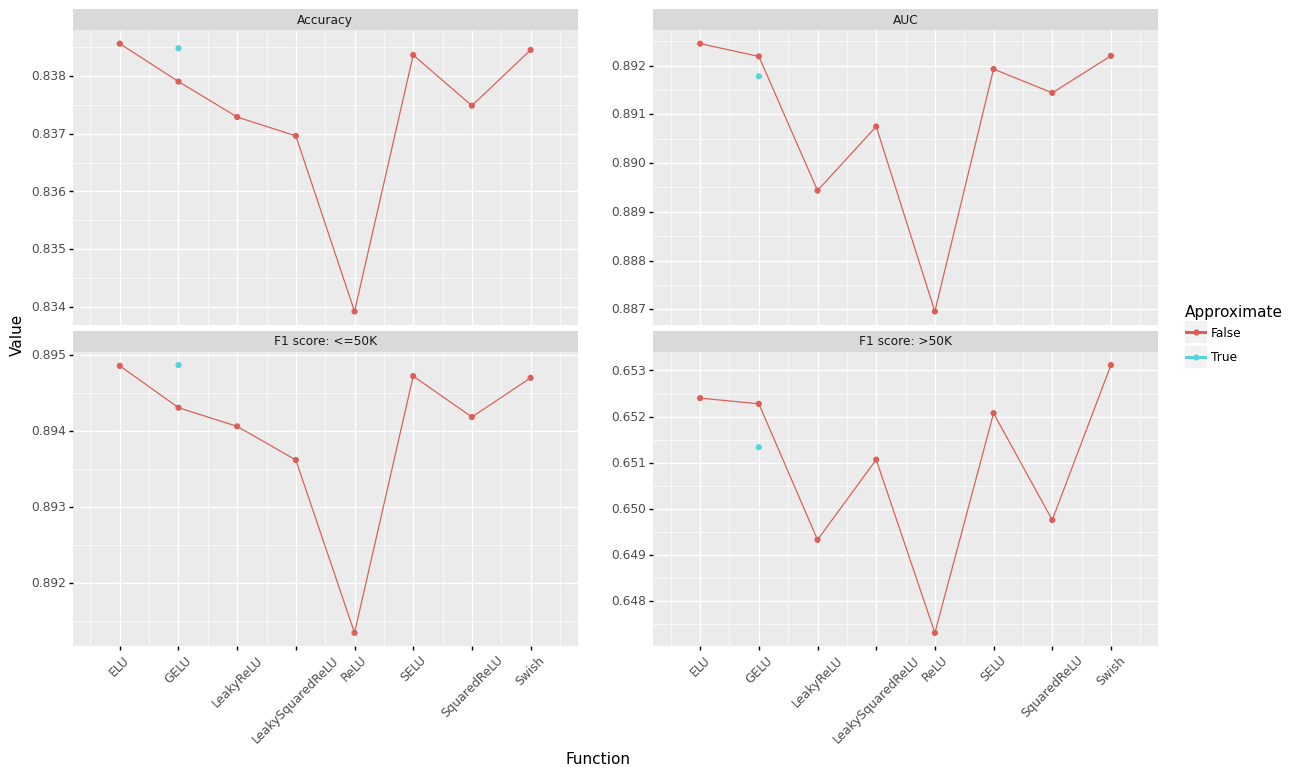

In [36]:
result_activation_function = plot_hp_tuning("activation_function", x_tick_angle=45)

In [37]:
result_activation_function

,Function,Approximate,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,ELU,False,0.838558,0.892448,0.773628,0.894855,0.652401,0.002218,0.001668,0.003455,0.001611,0.006190
1,GELU,False,0.837902,0.892187,0.773290,0.894304,0.652277,0.001611,0.001725,0.003178,0.001339,0.006433
2,GELU,True,0.838478,0.891778,0.773100,0.894865,0.651336,0.003025,0.002277,0.006286,0.002115,0.011887
3,LeakyReLU,False,0.837288,0.889435,0.771694,0.894059,0.649329,0.001547,0.001337,0.002952,0.001180,0.005733
4,LeakySquaredReLU,False,0.836961,0.890749,0.772341,0.893615,0.651067,0.001975,0.001969,0.003827,0.001476,0.007391
5,ReLU,False,0.833923,0.886956,0.769326,0.891341,0.647311,0.002140,0.002219,0.004789,0.002173,0.010591
6,SELU,False,0.838361,0.891927,0.773397,0.894720,0.652074,0.001870,0.001530,0.002485,0.001452,0.004469
7,SquaredReLU,False,0.837485,0.891439,0.771970,0.894181,0.649758,0.002444,0.002017,0.004117,0.001796,0.007585
8,Swish,False,0.838449,0.892198,0.773907,0.894697,0.653117,0.001563,0.001199,0.003062,0.001149,0.005878


  0%|          | 0/150 [00:00<?, ?it/s]

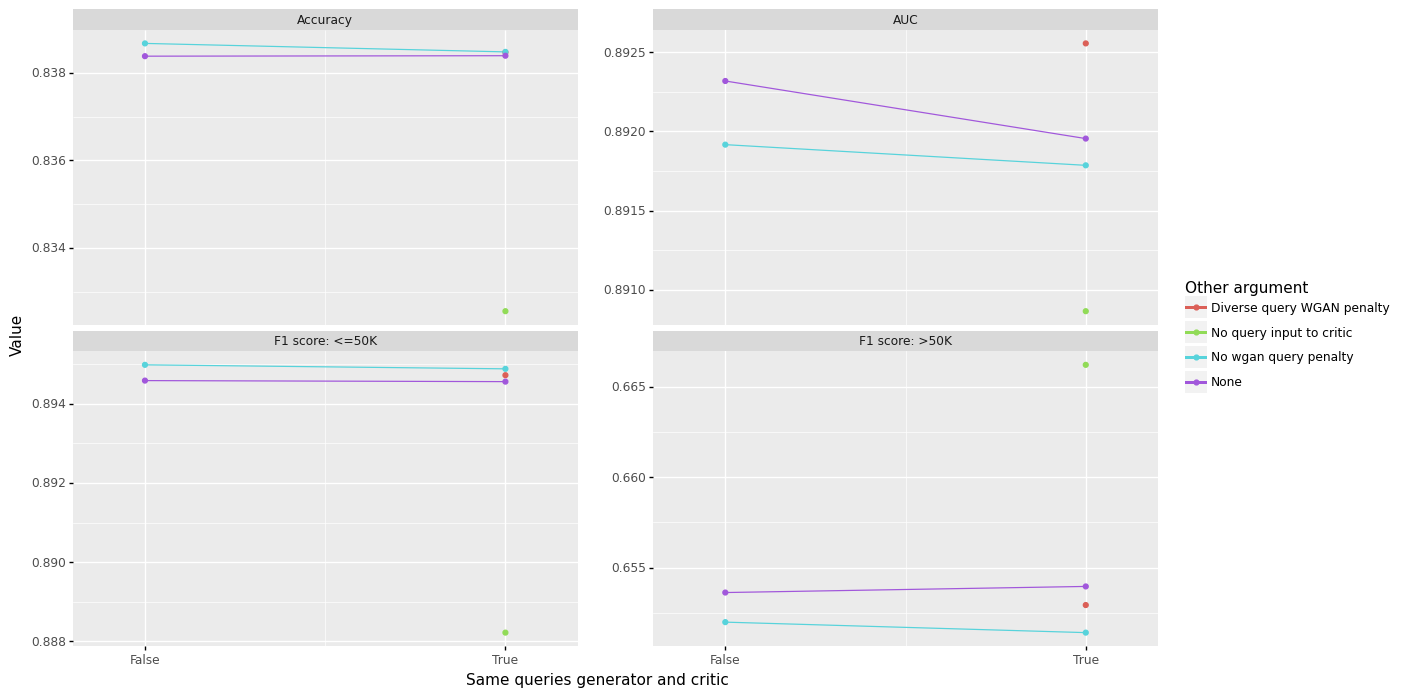

In [38]:
result_wgan_penalty_query = plot_hp_tuning("wgan_penalty_query")

In [39]:
result_wgan_penalty_query

,Same queries generator and critic,Other argument,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,No wgan query penalty,0.838675,0.891917,0.773488,0.894979,0.651998,0.002685,0.001814,0.004259,0.002091,0.008056
1,False,None,0.838382,0.892318,0.774106,0.894582,0.653631,0.002948,0.001882,0.003579,0.002392,0.006577
2,True,Diverse query WGAN penalty,0.838470,0.892555,0.773829,0.894718,0.652940,0.002295,0.001759,0.003219,0.002018,0.006589
3,True,No query input to critic,0.832550,0.890866,0.777210,0.888223,0.666198,0.002775,0.002407,0.003933,0.002226,0.007234
4,True,No wgan query penalty,0.838481,0.891786,0.773149,0.894878,0.651419,0.001663,0.001263,0.003230,0.001218,0.006179
5,True,None,0.838393,0.891955,0.774262,0.894555,0.653968,0.001896,0.001499,0.004168,0.001579,0.008510


  0%|          | 0/170 [00:00<?, ?it/s]

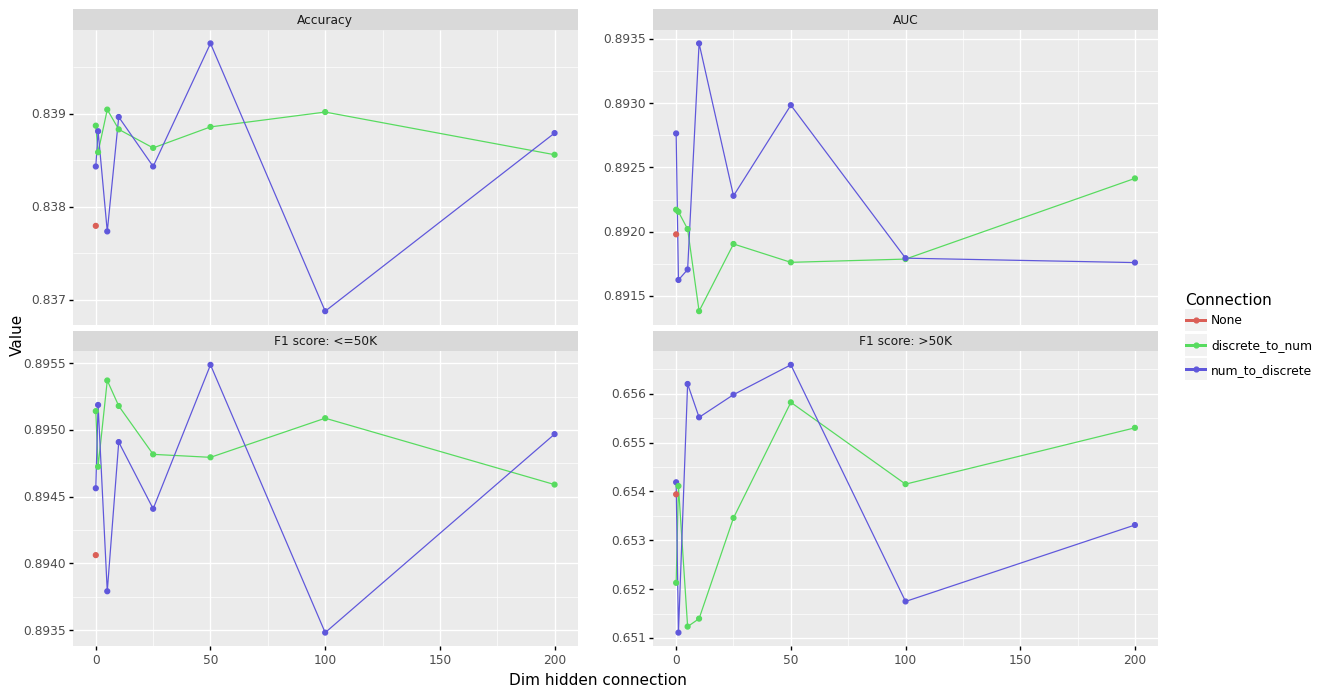

In [41]:
result_add_connection_advanced = plot_hp_tuning("add_connection_advanced")

In [42]:
result_add_connection_advanced

,Dim hidden connection,Connection,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0,None,0.837795,0.891980,0.774001,0.894062,0.653940,0.001423,0.001625,0.002763,0.001151,0.005537
1,0,discrete_to_num,0.838871,0.892171,0.773635,0.895141,0.652130,0.002337,0.001681,0.003792,0.001742,0.007017
2,0,num_to_discrete,0.838433,0.892764,0.774375,0.894563,0.654187,0.002105,0.001873,0.003203,0.002032,0.007166
3,1,discrete_to_num,0.838586,0.892155,0.774418,0.894724,0.654111,0.002047,0.001472,0.002731,0.001511,0.004641
4,1,num_to_discrete,0.838811,0.891624,0.773149,0.895187,0.651112,0.001176,0.001271,0.002468,0.000984,0.005051
5,5,discrete_to_num,0.839044,0.892020,0.773303,0.895370,0.651235,0.001559,0.001405,0.002153,0.001375,0.004504
6,5,num_to_discrete,0.837736,0.891706,0.774994,0.893792,0.656197,0.002494,0.002349,0.003797,0.001929,0.007082
7,10,discrete_to_num,0.838831,0.891381,0.773289,0.895179,0.651398,0.003144,0.002183,0.004120,0.002227,0.006624
8,10,num_to_discrete,0.838964,0.893465,0.775212,0.894909,0.655515,0.001867,0.001943,0.003195,0.001484,0.006194
9,25,discrete_to_num,0.838632,0.891904,0.774138,0.894817,0.653458,0.002715,0.001612,0.002704,0.002203,0.004577


In [ ]:
result_qt_distribution = plot_hp_tuning("qt_distribution")

In [ ]:
result_qt_distribution

In [44]:
from sklearn.preprocessing import QuantileTransformer

In [45]:
??QuantileTransformer